In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn

In [22]:
class PCA:
    def __init__(self,n_comp):
        self.n_comp = n_comp
        self.eigenvecs = None
        self.mean = None
    
    def fit(self,X):
        # mean 
        self.mean = np.mean(X,axis = 0)
        X = X - self.mean
        # covariance matrix
        cov = np.cov(X.T)
        # eigenvectors and eigenvalues
        eigenvalues,eigenvectors = np.linalg.eig(cov)
        # sort eigenvectors by eigenvalues
        eigenvectors = eigenvectors.T
        idx_eigens = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx_eigens]
        eigenvectors = eigenvectors[idx_eigens]
        # store n_comp eigenvectors
        self.eigenvecs = eigenvectors[:self.n_comp]
    def transform(self,X):
        X = X - self.mean
        return np.dot(X,self.eigenvecs.T)
        

In [23]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [30]:
pca = PCA(2)
pca.fit(X)
X_transformed = pca.transform(X)

In [31]:
print(np.shape(X))
print(np.shape(X_transformed))

(150, 4)
(150, 2)


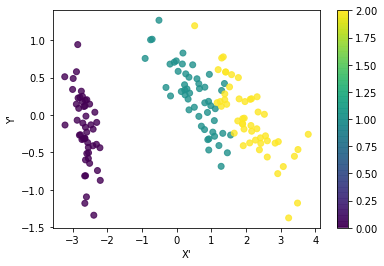

In [36]:
plt.scatter(X_transformed[:,0],X_transformed[:,1],c = y, alpha = 0.8)
plt.xlabel('X\'')
plt.ylabel('Y\'')
plt.colorbar()
plt.show()

In [49]:
X_transformed_sklearn = sklearn.decomposition.PCA(2).fit_transform(X)


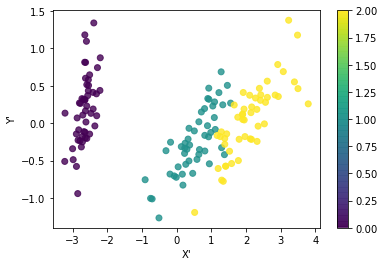

In [51]:
plt.scatter(X_transformed_sklearn[:,0],X_transformed_sklearn[:,1],c = y, alpha = 0.8)
plt.xlabel('X\'')
plt.ylabel('Y\'')
plt.colorbar()
plt.show()